In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import qc, config, tools

from importlib import reload

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [2]:
reload(qc)

#query_n = 75

a = qc.QueryQC()
a.test = "ds"
a.scale = 1
a.cid = "01"
a.stream_n = 1
a.desc =  f"qc_query"
a.seq_id = "NA"

a.verbose = False
a.verbose_query = False
a.qual = False
a.save = True
a.verbose_iter = False

a.set_timestamp_dir()

#a.run_single(query_n = query_n)

seq = tools.tpc_stream(test="ds", n=1)
#seq = tools.tpc_stream(test="h", n=1)

#seq = [31, 36, 51, 70, 75, 86, 98]

# 31 sort order in Pandas fixed

# 36 grouping removed, total results not limited to 100, 115 now return, 71% identical

# 70 grouping, rollup not supported by BQ both removed

# 75 UNION / UNION ALL / UNION DISTINCT - BQ changed from UNION to UNION DISTINCT

# 86 grouping > removed grouping, queries are not 59% identical

# errors this pass
# [27, 36, 49, 51, 86, 98]

# 27 grouping removed

# 49 99.9% complete, one value off - this is a floating point difference!

# 51 row 22 is off, this row: 22	22	1998-02-06	-9999	65	65	65

# 98 row 1157 is off revenueratio is 0 in SF and 1 in BQ

# BQ data:
# AAAAAAAACNPBAAAA,Single points see worst stones. Sometimes large ra,Music,country,4.880,261.500,0.022

# SF data:
# AAAAAAAACNPBAAAA,Single points see worst stones. Sometimes large ra,Music,country,4.880,261.500,0.02198519


seq = [98]

a.run(seq=seq)
df_results = a.compare()

Result Folder Name:
/home/colin/code/bq_snowflake_benchmark/results/bqsf_ds_01_results--qc_query-2020-06-15_12:50:25.854470

Snowflake Query Stream Done!
Total Time Elapsed: 0 days 00:00:02.226044


BigQuery Query Stream Done!
Total Time Elapsed: 0 days 00:00:14.974464

BQ:
          i_item_id                                        i_item_desc  \
0  AAAAAAAAAAAEAAAA                   Lately roman incentives must not   
1  AAAAAAAAAABAAAAA  Surroundings ought to continue home for a nego...   
2  AAAAAAAAAABBAAAA  Changes may increase details. Personal cases f...   
3  AAAAAAAAAADEAAAA  Distinct mistakes may resist rather police. Am...   
4  AAAAAAAAAAFCAAAA                                        Efficient,    

  i_category   i_class  i_current_price  itemrevenue  revenueratio  
0      Shoes      mens                2         1731             0  
1      Music      rock                0        13062             0  
2   Children  toddlers                4        11769             0  
3   

In [3]:
x = df_results.match.sum()/len(df_results)
print(f"Query Stream Complete: {x*100}%")
print("Error Queries:",
      list(df_results.loc[df_results.match == False, "q_sf"].values))

Query Stream Complete: 0.0%
Error Queries: [98]


## Query Result from CSV

In [4]:
df_sf1 = a.result_sf_csv
df_bq1 = a.result_sf_csv

## Query Result Comparison

In [5]:
df_sf = a.result_sf
df_bq = a.result_bq

In [6]:
df_sf.dtypes

I_ITEM_ID           object
I_ITEM_DESC         object
I_CATEGORY          object
I_CLASS             object
I_CURRENT_PRICE    float64
ITEMREVENUE        float64
REVENUERATIO        object
dtype: object

In [7]:
df_bq.dtypes

i_item_id           object
i_item_desc         object
i_category          object
i_class             object
i_current_price    float64
itemrevenue        float64
revenueratio       float64
dtype: object

In [8]:
df_sf.columns = [s.lower() for s in df_sf.columns]

In [9]:
df_bq.head(10)

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,AAAAAAAAABECAAAA,So equal implications would not move closely f...,Children,infants,1.06,148.93,0.011991
1,AAAAAAAAABFCAAAA,Also satisfactory values may cover all. Nation...,Children,infants,4.98,7252.16,0.583907
2,AAAAAAAAABKDAAAA,"Statements must not find polish, economic hole...",Children,infants,2.56,10505.35,0.845837
3,AAAAAAAAACCBAAAA,Certain consequences belong very things; actua...,Children,infants,3.72,22975.11,1.849838
4,AAAAAAAAACOBAAAA,Complex farmers shall attend in a homes.,Children,infants,2.57,17193.93,1.384367
5,AAAAAAAAADHDAAAA,Also practical weeks ask on a circumstances. S...,Children,infants,2.07,4421.48,0.355995
6,AAAAAAAAADNAAAAA,Ra,Children,infants,2.80,5499.42,0.442785
7,AAAAAAAAADOAAAAA,Other aspects offer then however m,Children,infants,6.46,7418.60,0.597308
8,AAAAAAAAADOCAAAA,"National, clear liabilities cry in a hours. Ju...",Children,infants,0.95,9498.41,0.764763
9,AAAAAAAAAEJAAAAA,Eyes can split also grounds. Comparable users ...,Children,infants,2.07,7083.33,0.570313


In [10]:
df_sf.head(10)

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,AAAAAAAAABECAAAA,So equal implications would not move closely f...,Children,infants,1.06,148.93,0.01199108
1,AAAAAAAAABFCAAAA,Also satisfactory values may cover all. Nation...,Children,infants,4.98,7252.16,0.58390670
2,AAAAAAAAABKDAAAA,"Statements must not find polish, economic hole...",Children,infants,2.56,10505.35,0.84583686
3,AAAAAAAAACCBAAAA,Certain consequences belong very things; actua...,Children,infants,3.72,22975.11,1.84983792
4,AAAAAAAAACOBAAAA,Complex farmers shall attend in a homes.,Children,infants,2.57,17193.93,1.38436698
5,AAAAAAAAADHDAAAA,Also practical weeks ask on a circumstances. S...,Children,infants,2.07,4421.48,0.35599487
6,AAAAAAAAADNAAAAA,Ra,Children,infants,2.80,5499.42,0.44278507
7,AAAAAAAAADOAAAAA,Other aspects offer then however m,Children,infants,6.46,7418.60,0.59730759
8,AAAAAAAAADOCAAAA,"National, clear liabilities cry in a hours. Ju...",Children,infants,0.95,9498.41,0.76476322
9,AAAAAAAAAEJAAAAA,Eyes can split also grounds. Comparable users ...,Children,infants,2.07,7083.33,0.57031337


In [11]:
df_bq.tail(10)

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
2555,AAAAAAAAPFLDAAAA,Sometimes used workers may ask bodies. Areas m...,Shoes,womens,8.78,14505.20,1.268371
2556,AAAAAAAAPHKCAAAA,Dual millions enjoy with a,Shoes,womens,3.34,1180.06,0.103187
2557,AAAAAAAAPIBBAAAA,Etc new patients occur rapidly more educationa...,Shoes,womens,3.25,10741.18,0.939235
2558,AAAAAAAAPIIAAAAA,"Public conservatives take all rational, light ...",Shoes,womens,1.69,7357.95,0.643397
2559,AAAAAAAAPJNDAAAA,Very other wages will not call groups. Public ...,Shoes,womens,6.32,18247.61,1.595616
2560,AAAAAAAAPLLDAAAA,Then financial days choose most there new deta...,Shoes,womens,7.34,12663.32,1.107312
2561,AAAAAAAAPMKAAAAA,Teachers become hills. Over typical pri,Shoes,womens,33.72,2299.87,0.201106
2562,AAAAAAAAPONBAAAA,Free lands should not expect too personal offi...,Shoes,womens,9.61,3638.03,0.318118
2563,AAAAAAAAPPBAAAAA,New concentrations produce. Too technical minu...,Shoes,womens,1.31,7272.48,0.635924
2564,AAAAAAAAPPHDAAAA,Responsible cases turn that is. Unlikely chara...,Shoes,womens,2.21,1351.61,0.118188


In [12]:
df_sf.tail(10)

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
2555,AAAAAAAAPFLDAAAA,Sometimes used workers may ask bodies. Areas m...,Shoes,womens,8.78,14505.20,1.26837059
2556,AAAAAAAAPHKCAAAA,Dual millions enjoy with a,Shoes,womens,3.34,1180.06,0.10318737
2557,AAAAAAAAPIBBAAAA,Etc new patients occur rapidly more educationa...,Shoes,womens,3.25,10741.18,0.93923537
2558,AAAAAAAAPIIAAAAA,"Public conservatives take all rational, light ...",Shoes,womens,1.69,7357.95,0.64339736
2559,AAAAAAAAPJNDAAAA,Very other wages will not call groups. Public ...,Shoes,womens,6.32,18247.61,1.59561619
2560,AAAAAAAAPLLDAAAA,Then financial days choose most there new deta...,Shoes,womens,7.34,12663.32,1.10731205
2561,AAAAAAAAPMKAAAAA,Teachers become hills. Over typical pri,Shoes,womens,33.72,2299.87,0.20110633
2562,AAAAAAAAPONBAAAA,Free lands should not expect too personal offi...,Shoes,womens,9.61,3638.03,0.31811835
2563,AAAAAAAAPPBAAAAA,New concentrations produce. Too technical minu...,Shoes,womens,1.31,7272.48,0.63592365
2564,AAAAAAAAPPHDAAAA,Responsible cases turn that is. Unlikely chara...,Shoes,womens,2.21,1351.61,0.11818812


In [13]:
df_sf.dtypes

i_item_id           object
i_item_desc         object
i_category          object
i_class             object
i_current_price    float64
itemrevenue        float64
revenueratio        object
dtype: object

In [14]:
df_bq.dtypes

i_item_id           object
i_item_desc         object
i_category          object
i_class             object
i_current_price    float64
itemrevenue        float64
revenueratio       float64
dtype: object

In [15]:
def color_false(val):
    mapper = {True: 'white', False: 'red'}
    return 'color: %s' % mapper[val]

In [16]:
diff = df_sf.eq(df_bq)
diff.loc[0:5].style.applymap(color_false)

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False
2,True,True,True,True,True,True,False
3,True,True,True,True,True,True,False
4,True,True,True,True,True,True,False
5,True,True,True,True,True,False,False


In [17]:
df_diff = diff.sum().sum() / (diff.shape[0] * diff.shape[1])
print("Percent Data Match:", df_diff)

Percent Data Match: 0.8250069618490671


In [18]:
z = df_bq.itemrevenue == df_sf.itemrevenue
z.sum()/z.shape[0]

0.7808966861598441

In [19]:
qc.assert_equal(df_sf, df_bq)

False

In [20]:
x = df_sf.loc[5, "itemrevenue"]
print(x, type(x))

4421.48 <class 'numpy.float64'>


In [21]:
y = df_bq.loc[5, "itemrevenue"]
print(y, type(y))

4421.4800000000005 <class 'numpy.float64'>


In [22]:
x == y

False

In [23]:
g = df_sf.loc[5, "revenueratio"]
g

Decimal('0.35599487')

In [24]:
h = df_bq.loc[5, "revenueratio"]
h

0.3559948732963709

In [25]:
str(h)

'0.3559948732963709'

In [26]:
import decimal

In [27]:
decimal.Decimal(str(h)[:5])

Decimal('0.355')

In [28]:
"{:4.10}".format(h)

'0.3559948733'

In [29]:
"{:.10}".format(float(1234.56789012345))

'1234.56789'

In [30]:
"{:.3}".format(float(9.1234567890))

'9.12'

In [31]:
"{:.3}".format(float(9.125))

'9.12'

In [32]:
"{:.3}".format(float(9.126))

'9.13'

In [33]:
from pandas.testing import assert_frame_equal

In [34]:
df_sf.head()

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,AAAAAAAAABECAAAA,So equal implications would not move closely f...,Children,infants,1.06,148.93,0.01199108
1,AAAAAAAAABFCAAAA,Also satisfactory values may cover all. Nation...,Children,infants,4.98,7252.16,0.58390670
2,AAAAAAAAABKDAAAA,"Statements must not find polish, economic hole...",Children,infants,2.56,10505.35,0.84583686
3,AAAAAAAAACCBAAAA,Certain consequences belong very things; actua...,Children,infants,3.72,22975.11,1.84983792
4,AAAAAAAAACOBAAAA,Complex farmers shall attend in a homes.,Children,infants,2.57,17193.93,1.38436698


In [35]:
df_sf.dtypes

i_item_id           object
i_item_desc         object
i_category          object
i_class             object
i_current_price    float64
itemrevenue        float64
revenueratio        object
dtype: object

In [36]:
df_bq.head()

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,AAAAAAAAABECAAAA,So equal implications would not move closely f...,Children,infants,1.06,148.93,0.011991
1,AAAAAAAAABFCAAAA,Also satisfactory values may cover all. Nation...,Children,infants,4.98,7252.16,0.583907
2,AAAAAAAAABKDAAAA,"Statements must not find polish, economic hole...",Children,infants,2.56,10505.35,0.845837
3,AAAAAAAAACCBAAAA,Certain consequences belong very things; actua...,Children,infants,3.72,22975.11,1.849838
4,AAAAAAAAACOBAAAA,Complex farmers shall attend in a homes.,Children,infants,2.57,17193.93,1.384367


In [37]:
df_bq.dtypes

i_item_id           object
i_item_desc         object
i_category          object
i_class             object
i_current_price    float64
itemrevenue        float64
revenueratio       float64
dtype: object

In [39]:
['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price', 'itemrevenue', 'revenueratio']

['i_item_id',
 'i_item_desc',
 'i_category',
 'i_class',
 'i_current_price',
 'itemrevenue',
 'revenueratio']

In [45]:
w = ['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price']
w

['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price']

In [46]:
assert_frame_equal(df_sf[w], df_bq[w])

In [49]:
w = ['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price', 'itemrevenue']
w

['i_item_id',
 'i_item_desc',
 'i_category',
 'i_class',
 'i_current_price',
 'itemrevenue']

In [48]:
assert_frame_equal(df_sf[w], df_bq[w])

In [50]:
w = ['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price', 'itemrevenue', 'revenueratio']
w

['i_item_id',
 'i_item_desc',
 'i_category',
 'i_class',
 'i_current_price',
 'itemrevenue',
 'revenueratio']

In [52]:
# this fails, dtypes of 'revenueratio' are different
# AssertionError: Attributes of DataFrame.iloc[:, 6] (column name="revenueratio") are different
#
# Attribute "dtype" are different
# [left]:  object
# [right]: float64

# assert_frame_equal(df_sf[w], df_bq[w])

In [54]:
df_sfx = tools.to_numeric(df_sf)
df_bqx = tools.to_numeric(df_bq)

In [55]:
w = ['i_item_id', 'i_item_desc', 'i_category', 'i_class', 'i_current_price', 'itemrevenue', 'revenueratio']
w

['i_item_id',
 'i_item_desc',
 'i_category',
 'i_class',
 'i_current_price',
 'itemrevenue',
 'revenueratio']

In [56]:
assert_frame_equal(df_sfx[w], df_bqx[w])

AssertionError: DataFrame.iloc[:, 6] (column name="revenueratio") are different

DataFrame.iloc[:, 6] (column name="revenueratio") values are different (0.11696 %)
[left]:  [0.01199108, 0.5839067, 0.84583686, 1.84983792, 1.38436698, 0.35599487, 0.44278507, 0.59730759, 0.76476322, 0.57031337, 0.57530529, 0.66175974, 0.96487084, 0.99470965, 0.22620652, 0.58440508, 0.30654908, 1.09633954, 0.90829787, 1.31567089, 0.01823501, 0.46573583, 0.3397349, 0.44332693, 0.04718171, 0.00464007, 0.5755412, 0.53430873, 0.22932888, 0.11603964, 0.43621989, 0.46974225, 0.01043473, 0.06478387, 0.4442134, 0.08618714, 0.58626578, 1.55958102, 0.17104015, 0.62315286, 0.62163999, 0.18881944, 0.90057489, 0.68612676, 0.91818832, 1.26409227, 1.11741431, 0.25305017, 0.47293467, 0.06241512, 0.28028674, 0.22887317, 0.7895932, 0.1568494, 0.3346222, 1.23619386, 0.52621699, 0.01083086, 0.02717699, 0.1945843, 0.09218469, 1.22359087, 0.64667689, 0.37504228, 0.82500363, 0.68242308, 0.16090171, 0.31029463, 0.27465392, 2.07844459, 0.36210756, 0.48938546, 0.22164857, 0.11844139, 0.32399263, 0.45290659, 0.51096264, 0.61510057, 0.45458694, 0.46173344, 1.19918037, 0.08083854, 0.24243348, 0.22558575, 0.55397368, 0.17721725, 0.4610402, 0.13550491, 0.84897452, 0.08522016, 1.08536214, 0.42308308, 1.28258653, 0.09005024, 0.5015577, 0.48739353, 0.20406171, 0.3898248, 0.28749282, 0.1894072, ...]
[right]: [0.011991079113787355, 0.5839066964738072, 0.8458368560264956, 1.849837921560243, 1.384366983864378, 0.3559948732963709, 0.4427850688239069, 0.5973075909054111, 0.7647632160423619, 0.570313371510531, 0.5753052932526569, 0.6617597417856016, 0.9648708402648247, 0.9947096499040485, 0.22620651829843264, 0.5844050834993517, 0.3065490832919453, 1.096339540533056, 0.9082978742505123, 1.3156708943547122, 0.0182350070347852, 0.465735831607665, 0.3397348959443978, 0.443326933877528, 0.047181711949770964, 0.004640071774172868, 0.5755412018124058, 0.5343087333711136, 0.2293288848332656, 0.11603963634172167, 0.4362198865843432, 0.46974225138005504, 0.01043472673837938, 0.06478387213144149, 0.4442134025610894, 0.0861871391751405, 0.5862657820712958, 1.5595810215669939, 0.17104014700726441, 0.6231528631509341, 0.6216399888036027, 0.18881943989591363, 0.9005748882262427, 0.6861267610765208, 0.9181883204892664, 1.26409226552853, 1.1174143069201763, 0.25305017489238085, 0.4729346658490113, 0.06241512474993593, 0.2802867440363544, 0.2288731706871296, 0.7895931958174298, 0.15684940173226933, 0.3346222019020591, 1.2361938641793908, 0.5262169892568611, 0.010830859883077118, 0.02717698814253531, 0.194584304359401, 0.09218469160370438, 1.2235908720778592, 0.6466768917863686, 0.37504227533725365, 0.8250036342398006, 0.6824230772033306, 0.16090171497874026, 0.310294634895876, 0.27465392395443294, 2.0784445880382365, 0.36210756198447086, 0.48938546343532063, 0.22164857168840443, 0.11844139481861876, 0.3239926291860032, 0.4529065927304013, 0.510962642591326, 0.6151005713214177, 0.45458693800069433, 0.46173343757861524, 1.1991803747588632, 0.08083853657305298, 0.2424334845550143, 0.22558574867533923, 0.5539736844404175, 0.17721724758881124, 0.46104020457539424, 0.1355049105413405, 0.8489745203860222, 0.08522015562477062, 1.0853621435923873, 0.42308308091587105, 1.2825865304344386, 0.0900502424846115, 0.5015577009994271, 0.4873935256304787, 0.2040617093314275, 0.3898248048832911, 0.2874928246157136, 0.1894071984236155, ...]

In [59]:
def get_max_decimal_length(df):
    """Get the maximum length of the fractional part of the values or None if no values present."""
    values = df.dropna()
    return None if values.empty else values.astype(str).str.split(".", expand=True)[1].str.len().max()

In [60]:
def decimal_count(value):
    if pd.isnull(value):
        return None
    return len(str(value).split(".")[1])

In [88]:
df = pd.DataFrame({"a": [0.1, 0.12, 0.123, 0.1234, None, 0.12345]},
              index=["ix"+str(n) for n in range(6)])

In [89]:
df

,a
ix0,0.10000
ix1,0.12000
ix2,0.12300
ix3,0.12340
ix4,NaN
ix5,0.12345


In [90]:
df["place"] = df.a.apply(decimal_count)

In [91]:
df

,a,place
ix0,0.10000,1.0
ix1,0.12000,2.0
ix2,0.12300,3.0
ix3,0.12340,4.0
ix4,NaN,NaN
ix5,0.12345,5.0


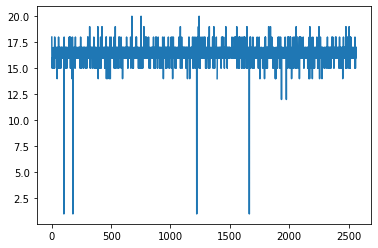

In [93]:
df_bqx.revenueratio.apply(decimal_count).plot();

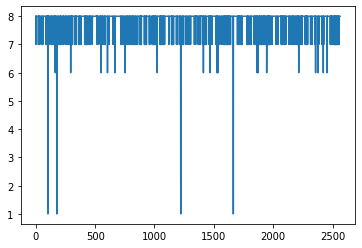

In [94]:
df_sfx.revenueratio.apply(decimal_count).plot();

In [96]:
df_sfx.revenueratio.head()

0    0.011991
1    0.583907
2    0.845837
3    1.849838
4    1.384367
Name: revenueratio, dtype: float64

In [97]:
df_bqx.revenueratio.head()

0    0.011991
1    0.583907
2    0.845837
3    1.849838
4    1.384367
Name: revenueratio, dtype: float64

In [98]:
assert_frame_equal(df_sfx[w], df_bqx[w])

AssertionError: DataFrame.iloc[:, 6] (column name="revenueratio") are different

DataFrame.iloc[:, 6] (column name="revenueratio") values are different (0.11696 %)
[left]:  [0.01199108, 0.5839067, 0.84583686, 1.84983792, 1.38436698, 0.35599487, 0.44278507, 0.59730759, 0.76476322, 0.57031337, 0.57530529, 0.66175974, 0.96487084, 0.99470965, 0.22620652, 0.58440508, 0.30654908, 1.09633954, 0.90829787, 1.31567089, 0.01823501, 0.46573583, 0.3397349, 0.44332693, 0.04718171, 0.00464007, 0.5755412, 0.53430873, 0.22932888, 0.11603964, 0.43621989, 0.46974225, 0.01043473, 0.06478387, 0.4442134, 0.08618714, 0.58626578, 1.55958102, 0.17104015, 0.62315286, 0.62163999, 0.18881944, 0.90057489, 0.68612676, 0.91818832, 1.26409227, 1.11741431, 0.25305017, 0.47293467, 0.06241512, 0.28028674, 0.22887317, 0.7895932, 0.1568494, 0.3346222, 1.23619386, 0.52621699, 0.01083086, 0.02717699, 0.1945843, 0.09218469, 1.22359087, 0.64667689, 0.37504228, 0.82500363, 0.68242308, 0.16090171, 0.31029463, 0.27465392, 2.07844459, 0.36210756, 0.48938546, 0.22164857, 0.11844139, 0.32399263, 0.45290659, 0.51096264, 0.61510057, 0.45458694, 0.46173344, 1.19918037, 0.08083854, 0.24243348, 0.22558575, 0.55397368, 0.17721725, 0.4610402, 0.13550491, 0.84897452, 0.08522016, 1.08536214, 0.42308308, 1.28258653, 0.09005024, 0.5015577, 0.48739353, 0.20406171, 0.3898248, 0.28749282, 0.1894072, ...]
[right]: [0.011991079113787355, 0.5839066964738072, 0.8458368560264956, 1.849837921560243, 1.384366983864378, 0.3559948732963709, 0.4427850688239069, 0.5973075909054111, 0.7647632160423619, 0.570313371510531, 0.5753052932526569, 0.6617597417856016, 0.9648708402648247, 0.9947096499040485, 0.22620651829843264, 0.5844050834993517, 0.3065490832919453, 1.096339540533056, 0.9082978742505123, 1.3156708943547122, 0.0182350070347852, 0.465735831607665, 0.3397348959443978, 0.443326933877528, 0.047181711949770964, 0.004640071774172868, 0.5755412018124058, 0.5343087333711136, 0.2293288848332656, 0.11603963634172167, 0.4362198865843432, 0.46974225138005504, 0.01043472673837938, 0.06478387213144149, 0.4442134025610894, 0.0861871391751405, 0.5862657820712958, 1.5595810215669939, 0.17104014700726441, 0.6231528631509341, 0.6216399888036027, 0.18881943989591363, 0.9005748882262427, 0.6861267610765208, 0.9181883204892664, 1.26409226552853, 1.1174143069201763, 0.25305017489238085, 0.4729346658490113, 0.06241512474993593, 0.2802867440363544, 0.2288731706871296, 0.7895931958174298, 0.15684940173226933, 0.3346222019020591, 1.2361938641793908, 0.5262169892568611, 0.010830859883077118, 0.02717698814253531, 0.194584304359401, 0.09218469160370438, 1.2235908720778592, 0.6466768917863686, 0.37504227533725365, 0.8250036342398006, 0.6824230772033306, 0.16090171497874026, 0.310294634895876, 0.27465392395443294, 2.0784445880382365, 0.36210756198447086, 0.48938546343532063, 0.22164857168840443, 0.11844139481861876, 0.3239926291860032, 0.4529065927304013, 0.510962642591326, 0.6151005713214177, 0.45458693800069433, 0.46173343757861524, 1.1991803747588632, 0.08083853657305298, 0.2424334845550143, 0.22558574867533923, 0.5539736844404175, 0.17721724758881124, 0.46104020457539424, 0.1355049105413405, 0.8489745203860222, 0.08522015562477062, 1.0853621435923873, 0.42308308091587105, 1.2825865304344386, 0.0900502424846115, 0.5015577009994271, 0.4873935256304787, 0.2040617093314275, 0.3898248048832911, 0.2874928246157136, 0.1894071984236155, ...]

In [99]:
tools.truncate(9.12345, 3)

9.123

In [100]:
df_sfy = df_sfx.copy()
df_bqy = df_bqx.copy()

In [102]:
pd.isnull(df_sfy.revenueratio).sum()

8

In [105]:
import math

In [106]:
def truncate(x, n):
    """Truncate a float to a certain number of decimal places
    
    Parameters
    ----------
    x : float, value to truncate
    n : int, number of decimal places to keep
    
    Returns
    -------
    float : truncated value
    """
    if pd.isnull(x):
        return np.nan
    else:
        return math.trunc(x * math.pow(10, n)) / math.pow(10, n)

In [107]:
df_sfy.revenueratio = df_sfy.revenueratio.apply(lambda x: truncate(x, 3))

In [108]:
df_bqy.revenueratio = df_bqy.revenueratio.apply(lambda x: truncate(x, 3))

In [109]:
df_sfy.revenueratio.head()

0    0.011
1    0.583
2    0.845
3    1.849
4    1.384
Name: revenueratio, dtype: float64

In [110]:
df_bqy.revenueratio.head()

0    0.011
1    0.583
2    0.845
3    1.849
4    1.384
Name: revenueratio, dtype: float64

In [111]:
assert_frame_equal(df_sfy[w], df_bqy[w])

In [112]:
df_sfy

,i_item_id,i_item_desc,i_category,i_class,i_current_price,itemrevenue,revenueratio
0,AAAAAAAAABECAAAA,So equal implications would not move closely f...,Children,infants,1.06,148.93,0.011
1,AAAAAAAAABFCAAAA,Also satisfactory values may cover all. Nation...,Children,infants,4.98,7252.16,0.583
2,AAAAAAAAABKDAAAA,"Statements must not find polish, economic hole...",Children,infants,2.56,10505.35,0.845
3,AAAAAAAAACCBAAAA,Certain consequences belong very things; actua...,Children,infants,3.72,22975.11,1.849
4,AAAAAAAAACOBAAAA,Complex farmers shall attend in a homes.,Children,infants,2.57,17193.93,1.384
5,AAAAAAAAADHDAAAA,Also practical weeks ask on a circumstances. S...,Children,infants,2.07,4421.48,0.355
6,AAAAAAAAADNAAAAA,Ra,Children,infants,2.80,5499.42,0.442
7,AAAAAAAAADOAAAAA,Other aspects offer then however m,Children,infants,6.46,7418.60,0.597
8,AAAAAAAAADOCAAAA,"National, clear liabilities cry in a hours. Ju...",Children,infants,0.95,9498.41,0.764
9,AAAAAAAAAEJAAAAA,Eyes can split also grounds. Comparable users ...,Children,infants,2.07,7083.33,0.570
